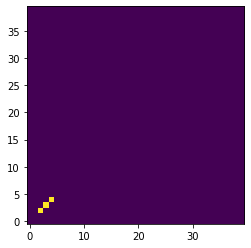

In [125]:
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm
import cv2
# col = np.array([1,2,3,5])
# row = np.array([1,2,3,5])
# data = np.array([1,1,1,1])
row = np.array([2,3,4])
col = np.array([2,3,4])
data = np.array([110,110,110])
arraysize = 40
hough_space_size_divisor = 2
threshold = 2   #fairly good, no effect changing from 1 through 10
image = sparse.coo_matrix((data, (row,col)),shape=(arraysize, arraysize), dtype=float).toarray()
plt.imshow(image, origin='lower')
# image = np.full(shape=(3,3),fill_value=(data), dtype=float)

threshold 2
maxima num_objects 12
r 0.0
theta radians 0.0
theta degrees 0.0
px []
py []


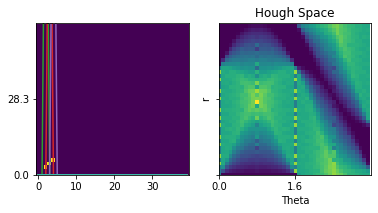

In [142]:
wafer_number = 55826023
theta_max = 1.0 * math.pi 
theta_min = 0.0
r_min = 0.0
r_dim = arraysize 
theta_dim = arraysize

plt.close()
print('threshold',threshold)
# print('image',image)
# ax.plot(image, color='white')

img_shape = image.shape
x_max = img_shape[0]
y_max = img_shape[1]
r_max = math.hypot(x_max, y_max)
# # print('x_max',x_max)
# # print('y_max',y_max)
# # print('r_max',r_max)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image)

hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(x_max):
    for y in range(y_max):
        if image[x,y] == 255: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

# ax1.plot(hough_space, color='white')#, markeredgecolor='blue', markerfacecolor='red',marker='o', linestyle='dashed', linewidth=1, markersize=1)
ax2.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,20)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,20)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

# ax.plot(hough_space, color='white', markeredgecolor='blue', markerfacecolor='red',marker='o', linestyle='dashed', linewidth=2, markersize=12)

# neighborhood_size = hough_space.size/hough_space_size_divisor
# print('neighborhood_size',neighborhood_size)
# # for neighborhood_size in range(10,300):
# #     print('neighborhood_size',neighborhood_size)
# # # neighborhood_size = 200   fairly good

# data_min = ndimage.minimum_filter(hough_space, neighborhood_size)
# data_max = ndimage.maximum_filter(hough_space, neighborhood_size)
# maxima = (hough_space == data_max)

# # print('data_min',data_min)
# # print('data_max',data_max)
# diff = ((data_max - data_min) > threshold)
# # print('diff',diff)
# maxima[diff == 0] = 0

# # print('data_max',data_max)
# # print('data_min',data_min)
# # print('maxima',maxima)

#labeled - An integer ndarray where each unique feature in input has a unique label in the returned array
labeled, num_objects = ndimage.label(maxima) # non-zero values in input are features, num_objects are features found
print('maxima num_objects',num_objects)
# print('labeled',labeled)
#slices - A list of tuples, with each tuple containing N slices (with N the dimension of the input array). 
# Slices correspond to the minimal parallelepiped that contains the object. If a number is missing, None is returned instead of a slice.
slices = ndimage.find_objects(labeled) #Array containing objects defined by different labels. Labels with value 0 are ignored

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2
    y.append(y_center)

# print('x_center',x_center)
# print('y_center',y_center)
# print('x',x)
# print('y',y)
# plt.imshow(hough_space, origin='lower')
# plt.savefig('hough_space_i_j.png', bbox_inches = 'tight')

# plt.xlabel(r'px')
# plt.ylabel(r'py')
# plt.title('Plot')
# plt.autoscale(False)
# plt.figure()
# print('len(x)',len(x))
# print('len(y)',len(y))
#plt.savefig('hough_space_maximas.png', bbox_inches = 'tight')
#plt.savefig("hough_space_r_theta.png",bbox_inches='tight')

# plt.close()

line_index = 1

i = y[0]
j = x[0]

# print('i',i)
# print('j',j)
# print('r_max',r_max)
# print('r_dim',r_dim)
# print('theta_max',theta_max)
# print('theta_dim',theta_dim)

r = round( (1.0 * i * r_max ) / r_dim,1)
theta = round( (1.0 * j * theta_max) / theta_dim,1)

print('r', r)
print('theta radians', theta)
print('theta degrees', np.rad2deg(theta))

# ax1.autoscale(False)

px = []
py = []
for i in range(0, np.int64(r), 1):
   print('i',i)
   px.append(math.cos(theta) * i)
   py.append(math.sin(theta) * i)

ax1.plot(image)
print('px',px)
print('py',py)

# ax.plot(px, py, linewidth=1, linestyle=(2,(1,10)), color='green')
# plt.show()
# plt.close()

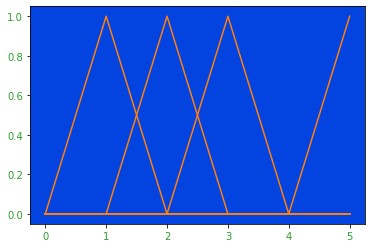

In [74]:
col = np.array([1,2,3,5])
row = np.array([1,2,3,5])
data = np.array([1,1,1,1])
image = sparse.coo_matrix((data, (row,col)),shape=(6, 6), dtype=float).toarray()
ax = plt.axes()
ax.set_facecolor('xkcd:blue')
ax.tick_params(labelcolor='tab:green')
fig = plt.figure(facecolor='white')
# fig.patch.set_facecolor('xkcd:mint green')
ax.plot(image, 'C1')
# ax.imshow(image, origin='lower') #,cmap=plt.cm.Paired
#image = np.zeros((50,50))
#image[10:40, 10:40] = np.eye(30)
# plt.imshow(image, cmap=plt.cm.Paired, origin='lower')
# plt.show()
plt.close()

In [136]:
# data = np.array([1,2,3,4,5,6,7,8,9])

r_dim = 3
theta_dim = 3

image = sparse.coo_matrix((data, (row,col)),shape=(3, 3), dtype=float).toarray()
print('image',image)
hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(r_dim):
    for y in range(r_dim):
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

print('hough_space',hough_space)
ax = plt.axes()
ax.imshow(hough_space, origin='lower') #,cmap=plt.cm.Paired
data_max = ndimage.maximum_filter(hough_space, 2)
print('data_max',data_max)
plt.close()

image [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
hough_space [[3. 1. 4.]
 [6. 8. 5.]
 [0. 0. 0.]]
data_max [[3. 3. 4.]
 [6. 8. 8.]
 [6. 8. 8.]]


In [135]:
image_width = 3
image_height = 3
radius = 1
row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
data = np.array([1,0,0,0,1,0,0,0,1])

image = sparse.coo_matrix((data, (row,col)),shape=(image_width, image_height), dtype=float).toarray()
result = np.zeros((image_width,image_height))

print('image',image)

for x in range(0,image_width-1,1):

    x0 = max(0, x - radius)
    x1 = min(image_width - 1, x + radius)

    for y in range(0,image_height-1,1):
    
        print('x',x,'y',y)
        y0 = max(0, y - radius)
        y1 = min(image_height - 1, y + radius)
        max_pixel = image[x, y]

        print('x0',x0,'x1',x1,'y0',y0,'y1',y1)
        print('max_pixel y loop',max_pixel)

        for u in range(x0,x1,1):

            for v in range(y0,y1,1):

                print('u',u,'v',v)
                print('image[u, v]',image[u, v])

                if image[u, v] > max_pixel:

                    print('max_pixel result',max_pixel)
                    max_pixel = image[u, v]

        print('max_pixel final',max_pixel)
        result[x, y] = max_pixel
        print('')

print('result',result)

data_max = ndimage.maximum_filter(image, 2)
print('data_max',data_max)

image [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
x 0 y 0
x0 0 x1 1 y0 0 y1 1
max_pixel y loop 1.0
u 0 v 0
image[u, v] 1.0
max_pixel final 1.0

x 0 y 1
x0 0 x1 1 y0 0 y1 2
max_pixel y loop 0.0
u 0 v 0
image[u, v] 1.0
max_pixel result 0.0
u 0 v 1
image[u, v] 0.0
max_pixel final 1.0

x 1 y 0
x0 0 x1 2 y0 0 y1 1
max_pixel y loop 0.0
u 0 v 0
image[u, v] 1.0
max_pixel result 0.0
u 1 v 0
image[u, v] 0.0
max_pixel final 1.0

x 1 y 1
x0 0 x1 2 y0 0 y1 2
max_pixel y loop 1.0
u 0 v 0
image[u, v] 1.0
u 0 v 1
image[u, v] 0.0
u 1 v 0
image[u, v] 0.0
u 1 v 1
image[u, v] 1.0
max_pixel final 1.0

result [[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]
data_max [[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]


len(edges) 302


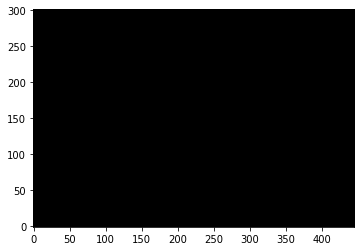

In [44]:
plt.close()
# img = plt.imshow(image, origin='lower', cmap='gray', vmin=0, vmax=255)
plt.savefig("image.png",bbox_inches='tight')
src = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(src, cmap='gray', origin='lower',vmin=0,vmax=0)
# gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(src,0,255,apertureSize = 3)
print('len(edges)',len(edges))
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges,1,np.pi/180, 1)#.astype(int)

print('lines.len: ',len(lines),'lines[0]: ',lines[0])
# if lines is not None:
#     for i in range(0, len(lines)):
#         rho = lines[i][0][0]
#         theta = lines[i][0][1]
#         pt1 = int(rho * math.cos(theta)), int(rho * math.sin(theta))
#         pt2 = int(rho * math.sin((math.pi/2) - theta)) , int(rho * math.cos((math.pi/2) - theta))
#         print('rho: ',rho,'theta: ',theta,'pt1: ',pt1,'pt2: ',pt2)
#         cv2.line(cdst, pt1, pt2, (0,0,255), 10, cv2.LINE_AA)

# plt.xlabel(r'Theta')
# plt.ylabel(r'r')
# plt.title('Hough Space')
# plt.imshow(src, origin='lower')
# plt.imshow(cdst, origin='lower')

In [69]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
np.random.seed(19680801)
data = np.random.randn(30, 30)
n = len(ListedColormap.colormaps)
fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                        constrained_layout=True, squeeze=False)
for [ax, cmap] in zip(axs.flat, colormaps):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)
plt.show()

AttributeError: type object 'ListedColormap' has no attribute 'colormaps'